In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [3]:
df  = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Cleaning data and making data ready

In [28]:
#Lable Encoding for columns: 
#["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
labelencoder = preprocessing.LabelEncoder()
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

In [29]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


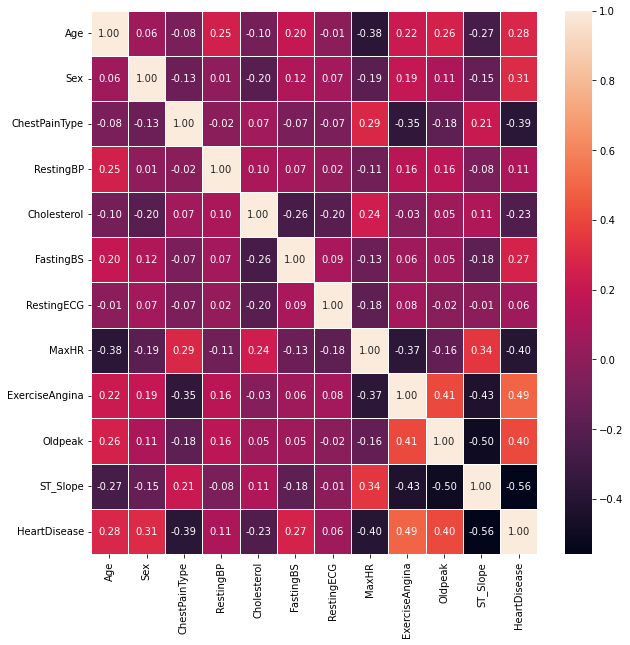

In [31]:
#correlation matrix 
#any value closer to 1 indicates stronger relationship, and weaker if closer to -1 
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f',ax=ax)
plt.show()

In [ ]:
#According to the heat map "Exersice Angina" and "old peak" 
#have the highest corrolation to heart disease
#"ST_slope", "max_HR" and "chestPainType" have the least corrolation

<AxesSubplot:xlabel='RestingBP'>

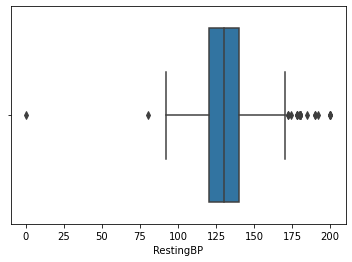

In [16]:
sns.boxplot(x='RestingBP',data=df)
#there are some outliers

<AxesSubplot:xlabel='Cholesterol'>

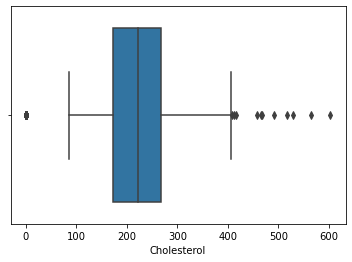

In [17]:
sns.boxplot(x='Cholesterol',data=df)
#there are some outliers

<AxesSubplot:xlabel='Oldpeak'>

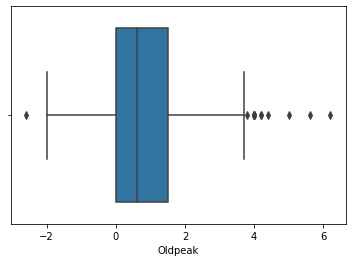

In [20]:
sns.boxplot(x='Oldpeak',data=df)
#some outliers

In [35]:
#starting training process 

In [36]:
#for the purpose of group work, all the group members used same traning and testing data with different methods
#From the original data, 70% was used for training and the rest (30%) for testing

In [38]:
db_train = pd.read_csv("heartTraining.csv")
db_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,32,1,0,118,529,0,1,130,0,0.0,1,1
1,36,1,2,112,340,0,1,184,0,1.0,1,0
2,51,1,0,95,0,1,1,126,0,2.2,1,1
3,59,1,0,130,126,0,1,125,0,0.0,1,1
4,60,1,0,117,230,1,1,160,1,1.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
637,54,1,0,110,239,0,1,126,1,2.8,1,1
638,48,1,1,130,245,0,1,160,0,0.0,2,0
639,57,0,0,128,303,0,0,159,0,0.0,2,0
640,64,1,0,134,273,0,1,102,1,4.0,0,1


In [39]:
db_test = pd.read_csv("heartTesting.csv")
db_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,55,1,0,115,0,1,1,155,0,0.1,1,1
1,66,1,0,120,302,0,0,151,0,0.4,1,0
2,51,1,0,110,0,1,1,92,0,0.0,1,1
3,55,1,2,120,0,0,2,125,1,2.5,1,1
4,62,1,1,140,271,0,1,152,0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271,41,1,0,110,289,0,1,170,0,0.0,1,1
272,61,1,2,120,0,0,1,80,1,0.0,1,1
273,61,1,0,110,0,1,1,113,0,1.4,1,1
274,44,1,0,120,169,0,1,144,1,2.8,0,1


In [40]:
#getting the x and y values for training

In [41]:
X_train = db_train.drop("HeartDisease", 1)
X_train

C:\Users\saran\AppData\Local\Temp/ipykernel_27772/2797747306.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = db_train.drop("HeartDisease",1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,32,1,0,118,529,0,1,130,0,0.0,1
1,36,1,2,112,340,0,1,184,0,1.0,1
2,51,1,0,95,0,1,1,126,0,2.2,1
3,59,1,0,130,126,0,1,125,0,0.0,1
4,60,1,0,117,230,1,1,160,1,1.4,2
...,...,...,...,...,...,...,...,...,...,...,...
637,54,1,0,110,239,0,1,126,1,2.8,1
638,48,1,1,130,245,0,1,160,0,0.0,2
639,57,0,0,128,303,0,0,159,0,0.0,2
640,64,1,0,134,273,0,1,102,1,4.0,0


In [43]:
Y_train = db_train["HeartDisease"]
Y_train

0      1
1      0
2      1
3      1
4      1
      ..
637    1
638    0
639    0
640    1
641    1
Name: HeartDisease, Length: 642, dtype: int64

In [47]:
#getting the x and y values for testing 

In [48]:
X_test = db_test.drop("HeartDisease", 1)
X_test

C:\Users\saran\AppData\Local\Temp/ipykernel_27772/1806666495.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = db_test.drop("HeartDisease", 1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,55,1,0,115,0,1,1,155,0,0.1,1
1,66,1,0,120,302,0,0,151,0,0.4,1
2,51,1,0,110,0,1,1,92,0,0.0,1
3,55,1,2,120,0,0,2,125,1,2.5,1
4,62,1,1,140,271,0,1,152,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
271,41,1,0,110,289,0,1,170,0,0.0,1
272,61,1,2,120,0,0,1,80,1,0.0,1
273,61,1,0,110,0,1,1,113,0,1.4,1
274,44,1,0,120,169,0,1,144,1,2.8,0


In [49]:
Y_test = db_test["HeartDisease"]
Y_test

0      1
1      0
2      1
3      1
4      0
      ..
271    1
272    1
273    1
274    1
275    1
Name: HeartDisease, Length: 276, dtype: int64

In [50]:
#starting the Random Forest Classification

In [51]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [55]:
#predicting based on x_test values
Y_predict = model.predict(X_test)
Y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

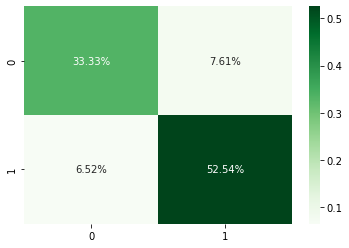

In [60]:
#The plot is TF,TN,FP,FN
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Greens')
plt.show()

In [61]:
ac = accuracy_score(Y_test,Y_predict)
print('Accuracy is: ', ac*100)

Accuracy is:  85.86956521739131
